In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
dataset = pd.read_csv("E:\\python\\New folder (3)\\stockmarket\\GOOG.csv")
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
0,27.781227,28.067940,27.725880,28.029045,28.029045,29350361,GOOGLE
1,27.948767,28.102844,27.818624,27.950762,27.950762,27034019,GOOGLE
2,27.823610,27.917353,27.675018,27.865496,27.865496,22002242,GOOGLE
3,27.788706,27.823112,27.347916,27.492022,27.492022,29169867,GOOGLE
4,27.537395,27.539391,27.203314,27.512465,27.512465,24410836,GOOGLE


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2518 non-null   float64
 1   High          2518 non-null   float64
 2   Low           2518 non-null   float64
 3   Close         2518 non-null   float64
 4   Adj Close     2518 non-null   float64
 5   Volume        2518 non-null   int64  
 6   company_name  2518 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [4]:
data = dataset[0:2000]
testdata = dataset[2000:2518]
data

,Open,High,Low,Close,Adj Close,Volume,company_name
0,27.781227,28.067940,27.725880,28.029045,28.029045,29350361,GOOGLE
1,27.948767,28.102844,27.818624,27.950762,27.950762,27034019,GOOGLE
2,27.823610,27.917353,27.675018,27.865496,27.865496,22002242,GOOGLE
3,27.788706,27.823112,27.347916,27.492022,27.492022,29169867,GOOGLE
4,27.537395,27.539391,27.203314,27.512465,27.512465,24410836,GOOGLE
...,...,...,...,...,...,...,...
1995,116.040497,116.691002,113.383301,114.584503,114.584503,31158000,GOOGLE
1996,113.710503,116.670998,113.650002,113.960999,113.960999,36502000,GOOGLE
1997,111.938004,114.856499,110.113503,113.161003,113.161003,41464000,GOOGLE
1998,114.845497,118.084999,114.000000,116.515503,116.515503,29738000,GOOGLE


In [5]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

C:\Users\aksha\AppData\Local\Temp\ipykernel_20020\668710601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Close"]=pd.to_numeric(data.Close,errors='coerce')


In [6]:
trainData

array([[ 28.0290451 ],
       [ 27.9507618 ],
       [ 27.86549568],
       ...,
       [113.16100311],
       [116.51550293],
       [114.79250336]])

In [7]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(2000, 1)

In [8]:
X_train = []
y_train = []

for i in range (60,len(trainData)): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [9]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1940, 60, 1)

In [10]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [11]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
61/61 - 22s - loss: 0.0153 - 22s/epoch - 354ms/step
Epoch 2/20
61/61 - 11s - loss: 0.0022 - 11s/epoch - 176ms/step
Epoch 3/20
61/61 - 11s - loss: 0.0018 - 11s/epoch - 185ms/step
Epoch 4/20
61/61 - 12s - loss: 0.0022 - 12s/epoch - 192ms/step
Epoch 5/20
61/61 - 11s - loss: 0.0020 - 11s/epoch - 174ms/step
Epoch 6/20
61/61 - 11s - loss: 0.0014 - 11s/epoch - 175ms/step
Epoch 7/20
61/61 - 11s - loss: 0.0017 - 11s/epoch - 177ms/step
Epoch 8/20
61/61 - 11s - loss: 0.0015 - 11s/epoch - 182ms/step
Epoch 9/20
61/61 - 10s - loss: 0.0015 - 10s/epoch - 170ms/step
Epoch 10/20
61/61 - 11s - loss: 0.0015 - 11s/epoch - 180ms/step
Epoch 11/20
61/61 - 11s - loss: 0.0015 - 11s/epoch - 178ms/step
Epoch 12/20
61/61 - 10s - loss: 0.0016 - 10s/epoch - 171ms/step
Epoch 13/20
61/61 - 11s - loss: 0.0013 - 11s/epoch - 181ms/step
Epoch 14/20
61/61 - 11s - loss: 0.0014 - 11s/epoch - 182ms/step
Epoch 15/20
61/61 - 11s - loss: 0.0013 - 11s/epoch - 183ms/step
Epoch 16/20
61/61 - 11s - loss: 0.0012 - 11s/epoc

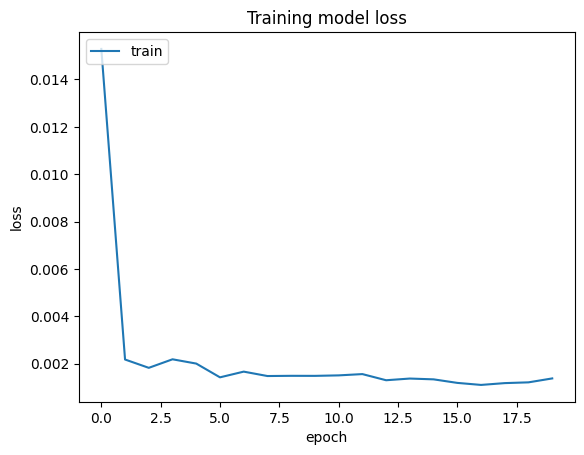

In [12]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
testData=dataset[2000:2518]
testData

,Open,High,Low,Close,Adj Close,Volume,company_name
2000,117.227501,117.227501,115.337502,116.701500,116.701500,21576000,GOOGLE
2001,115.237503,115.695648,112.141998,112.401001,112.401001,27982000,GOOGLE
2002,111.841003,113.587502,110.468002,110.745499,110.745499,29192000,GOOGLE
2003,112.085503,112.550003,106.373001,109.313004,109.313004,37586000,GOOGLE
2004,110.103996,112.005501,109.154251,111.666496,111.666496,31558000,GOOGLE
...,...,...,...,...,...,...,...
2513,173.880005,175.860001,172.449997,174.419998,174.419998,20742800,GOOGLE
2514,174.449997,175.190002,173.220001,175.130005,175.130005,14066600,GOOGLE
2515,176.535004,177.970001,175.289993,177.070007,177.070007,15233900,GOOGLE
2516,177.429993,178.710007,177.210007,178.350006,178.350006,14255800,GOOGLE


In [14]:

testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

C:\Users\aksha\AppData\Local\Temp\ipykernel_20020\3990921063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')


(458, 60, 1)

In [15]:
y_pred = model.predict(X_test)
y_pred

15/15 [==============================] - 4s 104ms/step


array([[0.69972   ],
       [0.70442265],
       [0.7089318 ],
       [0.7132914 ],
       [0.71713454],
       [0.7201855 ],
       [0.7219692 ],
       [0.7218668 ],
       [0.7196332 ],
       [0.7154611 ],
       [0.7102395 ],
       [0.7041175 ],
       [0.69714236],
       [0.6894857 ],
       [0.68140626],
       [0.6734662 ],
       [0.6660054 ],
       [0.65914565],
       [0.65334576],
       [0.64884466],
       [0.6459895 ],
       [0.6449181 ],
       [0.6446994 ],
       [0.6444665 ],
       [0.64342755],
       [0.6411676 ],
       [0.6377016 ],
       [0.63308364],
       [0.6273487 ],
       [0.6207923 ],
       [0.61369044],
       [0.6063554 ],
       [0.5990557 ],
       [0.592389  ],
       [0.5865522 ],
       [0.5813578 ],
       [0.5769834 ],
       [0.57398665],
       [0.5727082 ],
       [0.57316357],
       [0.57475716],
       [0.576691  ],
       [0.57823604],
       [0.5789675 ],
       [0.57892364],
       [0.5780089 ],
       [0.576671  ],
       [0.575

In [16]:
predicted_price = sc.inverse_transform(y_pred)

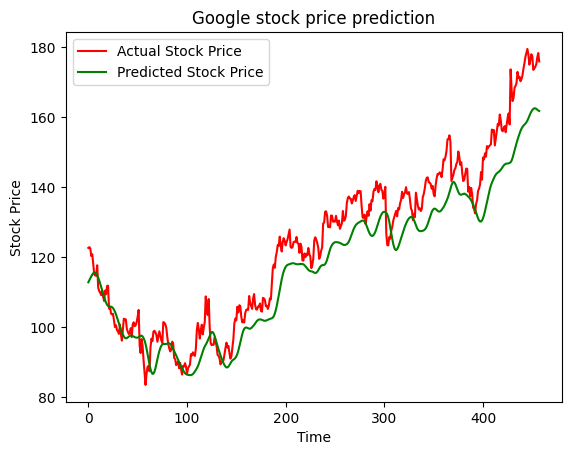

In [17]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [18]:
model2 = Sequential()

model2.add(LSTM(units=256, return_sequences = True, input_shape =(X_train.shape[1],1)))
model2.add(Dropout(0.2))

model2.add(LSTM(units=128, return_sequences = True))
model2.add(Dropout(0.2))

model2.add(LSTM(units=64, return_sequences = True))
model2.add(Dropout(0.2))

model2.add(LSTM(units=32, return_sequences = False))
model2.add(Dropout(0.2))

model2.add(Dense(units =1))
model2.compile(optimizer='adam',loss="mean_squared_error")

In [19]:
hist2 = model2.fit(X_train, y_train, epochs = 30, batch_size = 32, verbose=2)

Epoch 1/30
61/61 - 32s - loss: 0.0118 - 32s/epoch - 524ms/step
Epoch 2/30
61/61 - 19s - loss: 0.0033 - 19s/epoch - 309ms/step
Epoch 3/30
61/61 - 19s - loss: 0.0029 - 19s/epoch - 313ms/step
Epoch 4/30
61/61 - 19s - loss: 0.0034 - 19s/epoch - 304ms/step
Epoch 5/30
61/61 - 19s - loss: 0.0025 - 19s/epoch - 306ms/step
Epoch 6/30
61/61 - 18s - loss: 0.0031 - 18s/epoch - 298ms/step
Epoch 7/30
61/61 - 19s - loss: 0.0024 - 19s/epoch - 311ms/step
Epoch 8/30
61/61 - 18s - loss: 0.0021 - 18s/epoch - 300ms/step
Epoch 9/30
61/61 - 19s - loss: 0.0021 - 19s/epoch - 315ms/step
Epoch 10/30
61/61 - 18s - loss: 0.0022 - 18s/epoch - 295ms/step
Epoch 11/30
61/61 - 19s - loss: 0.0020 - 19s/epoch - 309ms/step
Epoch 12/30
61/61 - 18s - loss: 0.0021 - 18s/epoch - 299ms/step
Epoch 13/30
61/61 - 19s - loss: 0.0022 - 19s/epoch - 315ms/step
Epoch 14/30
61/61 - 18s - loss: 0.0017 - 18s/epoch - 302ms/step
Epoch 15/30
61/61 - 18s - loss: 0.0020 - 18s/epoch - 296ms/step
Epoch 16/30
61/61 - 18s - loss: 0.0020 - 18s/epoc

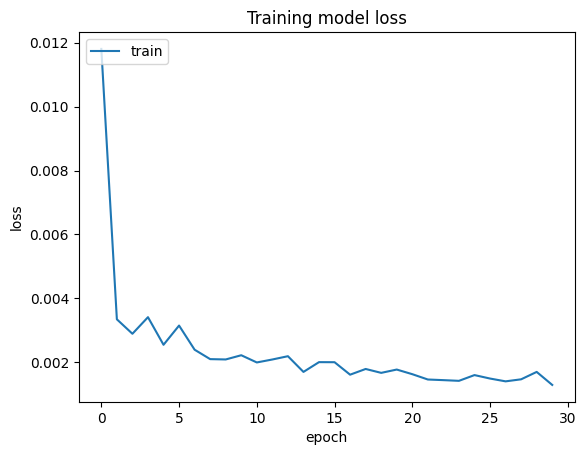

In [20]:
plt.plot(hist2.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [21]:
y_pred2 = model2.predict(X_test)
y_pred2

15/15 [==============================] - 5s 120ms/step


array([[0.70957077],
       [0.71257156],
       [0.7160004 ],
       [0.71994925],
       [0.7237338 ],
       [0.7267508 ],
       [0.72816926],
       [0.72705954],
       [0.72317   ],
       [0.717017  ],
       [0.71017355],
       [0.7030045 ],
       [0.69548434],
       [0.6876574 ],
       [0.6796886 ],
       [0.67221516],
       [0.66555375],
       [0.65966254],
       [0.6550272 ],
       [0.65184504],
       [0.65048826],
       [0.6510278 ],
       [0.6519053 ],
       [0.6517487 ],
       [0.6495337 ],
       [0.6450188 ],
       [0.63874215],
       [0.63127965],
       [0.6230117 ],
       [0.61453646],
       [0.6062635 ],
       [0.5985068 ],
       [0.5914217 ],
       [0.5856389 ],
       [0.5811543 ],
       [0.57735467],
       [0.57426834],
       [0.57265294],
       [0.57298815],
       [0.57520807],
       [0.5782742 ],
       [0.5808957 ],
       [0.5820599 ],
       [0.581428  ],
       [0.5794975 ],
       [0.57655853],
       [0.57361186],
       [0.571

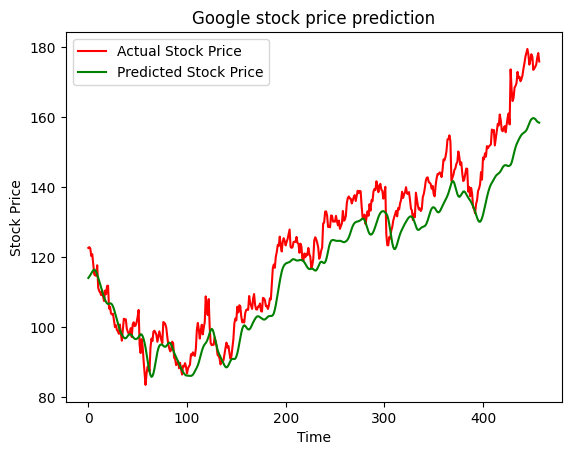

In [22]:
predicted_price2 = sc.inverse_transform(y_pred2)
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price2, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()